# Load video

In [25]:
import tkinter as tk
import tkinter.filedialog as fd
import pickle
import os

root = tk.Tk()
filez = fd.askopenfilenames(parent=root, \
                            title='Choose files')
root.destroy()
print(filez)

# create folder for modified videos
slash_index = [i for i,x in enumerate(filez[0]) if x=='/']
outpath = filez[0][:slash_index[-1]+1] + 'modified_video/'
frame_path = outpath+'images/'
video = filez[0]
video_name = filez[0][slash_index[-1]+1:]
print('new video saved in: '+outpath)
print('imported video name: '+video_name)

if not os.path.exists(outpath):
    os.makedirs(outpath)
if not os.path.exists(frame_path):
    os.makedirs(frame_path)

('E:/2024_04_30/20240430_12_13_41_067-00-DG/20240430_12_13_41_067-00-DG_XYTZ.avi',)
new video saved in: E:/2024_04_30/20240430_12_13_41_067-00-DG/modified_video/
imported video name: 20240430_12_13_41_067-00-DG_XYTZ.avi


In [3]:
import numpy as np
import cv2

saveName = outpath + 'labeled_video.avi'
cap = cv2.VideoCapture(video)
imageWidth = int(cap.get(3))
imageHeight = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter(saveName,  
                      cv2.VideoWriter_fourcc(*'MJPG'), 
                      fps, (imageWidth, imageHeight)) 
i = 0
mu = "\u03BC"
while(cap.isOpened()): 
      
    # Capture frames in the video 
    ret, frame = cap.read()
    if ret == False:
        break
  
    # describe the type of font to be used. 
    font = cv2.FONT_HERSHEY_SIMPLEX 
  
    # Use putText() method for inserting text on video 
    cv2.putText(frame,  
                f"Depth from glass: {i*5} um",  
                (50, 50),  
                font, 0.5,  
                (255, 255, 255),  
                2,  
                cv2.LINE_4) 
    # counting frames
    i+=1

    # save labled video
    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()

In [4]:
imageHeight


0

# Load image sequences from RAW file

In [51]:
root = tk.Tk()
image_path = fd.askdirectory(parent=root, title='Choose files')
root.destroy()
print(image_path)

# import OS module
import os
images = os.listdir(image_path)
print("Files and directories in '", image_path, "' :")
# prints all files
print(images[0])
slash_index = [i for i,x in enumerate(image_path) if x=='/']
outpath = image_path[:slash_index[-1]+1] + 'modified_img_seq/'
print(outpath)

if not os.path.exists(outpath):
    os.makedirs(outpath)

E:/2024_04_30/20240430_12_13_41_067-00-DG/image-seq
Files and directories in ' E:/2024_04_30/20240430_12_13_41_067-00-DG/image-seq ' :
20240430_12_13_41_067-00-DG_XYTZ00000.tif
E:/2024_04_30/20240430_12_13_41_067-00-DG/modified_img_seq/


In [41]:
len(images)

20000

# Load suite2p outputs

In [6]:
import numpy as np
root = tk.Tk()
filez = fd.askdirectory(parent=root, title='Choose files')
root.destroy()
print(filez)

F = np.load(filez+'/F.npy', allow_pickle=True)
Fneu = np.load(filez+'/Fneu.npy', allow_pickle=True)
spks = np.load(filez+'/spks.npy', allow_pickle=True)
stat = np.load(filez+'/stat.npy', allow_pickle=True)
ops =  np.load(filez+'/ops.npy', allow_pickle=True)
ops = ops.item()
iscell = np.load(filez+'/iscell.npy', allow_pickle=True)

E:/2024_04_30/data-analysis/067/DG/suite2p/plane0


# Get x/y shift of each frame

In [22]:
dx = ops['xoff']
dy = ops['yoff']

In [36]:
dx.shape[0]

20000

# Generate motion corrected video

In [52]:
import numpy as np
import cv2

saveName = outpath + 'motion_corrected_video.avi'
img = cv2.imread(image_path+'/'+images[0], cv2.IMREAD_COLOR)
#cap = cv2.VideoCapture(video)
imageWidth = int(img.shape[0])
imageHeight = int(img.shape[1])
#fps = cap.get(cv2.CAP_PROP_FPS)
fps = 30
out = cv2.VideoWriter(saveName,  
                      cv2.VideoWriter_fourcc(*'MJPG'), 
                      fps, (imageWidth, imageHeight)) 

for i in range(len(images)): 
      
    # Capture frames in the video 
    frame = cv2.imread(image_path+'/'+images[i], cv2.IMREAD_COLOR)
    
    # motion correction
    frame_c = np.roll(frame, (-dy[i], -dx[i]), axis=(0, 1))

    # save labled video
    #out.write(frame_c)
    # save motion corrected images
    cv2.imwrite(outpath+images[i], frame_c)

cap.release()
out.release()
cv2.destroyAllWindows()

In [46]:
images[1]

'20240430_12_13_41_067-00-DG_XYTZ00001.tif'

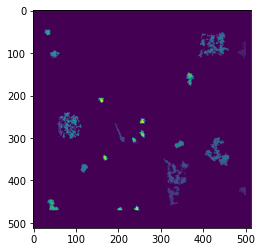

In [14]:
import matplotlib.pyplot as plt

im = np.zeros((ops['Ly'], ops['Lx']))
ncells = iscell.shape[0]
for n in range(0,ncells):
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    im[ypix,xpix] = n+1

plt.imshow(im)
plt.show()

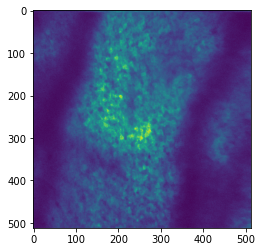

In [20]:
plt.imshow(ops['refImg'])

In [21]:
ops['refImg']

array([[6141, 5037, 5037, ..., 6635, 6553, 6738],
       [5864, 5302, 5143, ..., 6545, 6583, 6387],
       [5509, 5154, 5107, ..., 5728, 5797, 5974],
       ...,
       [6132, 5081, 5062, ..., 6611, 6785, 6659],
       [6103, 5046, 4900, ..., 6494, 6969, 6561],
       [5953, 5095, 5088, ..., 6470, 6717, 6555]], dtype=int16)